# **Mini Project-1**

## M.Tech 

### Question -1(20 Marks)

<h1 style="color: blue; font-family: Georgia; text-align: center;">
    <b>Assignment_1</b>
</h1>

a.Read the Dataset "turnout.csv" (1 mark)

b.Identify non-numerical inputs and convert into numerical wherever needed (3 marks) (*Hint: Use replace function if needed)

c. Check the dataset for null values. If yes, replace them with suitable average value. (2 marks) (*Think out of box)

d.Find mean, median and mode for atleast one possible column. (3 marks)

e.Check the outliers and remove if any. Is it always a good practice to remove outliers? (3 marks)

f.Find the appropriate columns and do encoding based on your understanding. (4 marks)

g.Plot the heatmap for the dataset with the applicable columns (4 marks)



In [198]:
import pandas as pd
import numpy as np
import seaborn as sns


#### a. Read the Dataset "turnout.csv" (1 mark)

In [201]:
turnout = pd.read_csv("turnout.csv", encoding='ISO-8859-1')

In [203]:
display(turnout.head())

,Employee ID,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,1011,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,1012,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,1013,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,1014,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,1015,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [205]:
display(turnout.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employee ID   1129 non-null   int64  
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1128 non-null   float64
 12  independ      1127 non-null   float64
 13  selfcontrol   1128 non-null   float64
 14  anxiety       1128 non-null   float64
 15  novator       1128 non-null   float64
dtypes: float64(6), int64(2), object(8)
memory usage: 141.3+ KB


None

#### b.Identify non-numerical inputs and convert into numerical whatever needed (3 marks) 
(*Hint: Use replace function if needed)

In [208]:
#Using LabelEncoder automatically finds non numeric columns & tranform then into numeric columns

from sklearn.preprocessing import LabelEncoder

#Copying dataframe
df = turnout.copy()

#Identifying Non_numeric columns
non_numeric_cols = df.select_dtypes(include=["object"]).columns

encoder = {}
#Label encode binary columns
binary_cols = [
    col for col in non_numeric_cols if df[col].nunique(dropna=True) == 2]
for col in binary_cols:
    le = LabelEncoder()
    df[col]=le.fit_transform(df[col])
    encoder[col] = le

#Step to convert multi columns into numeric
multi_cols = [
    col for col in non_numeric_cols if df[col].nunique(dropna=True) > 2]
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Employee ID                     1129 non-null   int64  
 1   event                           1129 non-null   int64  
 2   gender                          1129 non-null   int64  
 3   age                             1129 non-null   float64
 4   head_gender                     1129 non-null   int64  
 5   greywage                        1129 non-null   int64  
 6   extraversion                    1128 non-null   float64
 7   independ                        1127 non-null   float64
 8   selfcontrol                     1128 non-null   float64
 9   anxiety                         1128 non-null   float64
 10  novator                         1128 non-null   float64
 11  industry_Agriculture            1129 non-null   bool   
 12  industry_Banks                  11

In [210]:
turnout.info()
turnout.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employee ID   1129 non-null   int64  
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1128 non-null   float64
 12  independ      1127 non-null   float64
 13  selfcontrol   1128 non-null   float64
 14  anxiety       1128 non-null   float64
 15  novator       1128 non-null   float64
dtypes: float64(6), int64(2), object(8)
memory usage: 141.3+ KB


,Employee ID,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,1011,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,1012,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,1013,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,1014,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,1015,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [212]:
#Finding Non numerical binary columns
non_numeric_binary_cols = [col for col in turnout.select_dtypes(include=["object"]).columns
               if turnout[col].nunique(dropna=True) == 2]
display(non_numeric_binary_cols)

['gender', 'head_gender', 'greywage']

In [214]:
#Finding Non numerical multi columns
non_numeric_multi_cols = [col for col in turnout.select_dtypes(include=["object"]).columns
               if turnout[col].nunique(dropna=True) != 2]

display(non_numeric_multi_cols)

['industry', 'profession', 'traffic', 'coach', 'way']

In [216]:
#Using replace function as mentioned in question

#Replace binary categories columns
turnout["gender"] = turnout["gender"].replace({"m":1, "f":0})
turnout["head_gender"] = turnout["head_gender"].replace({"m":1, "f":0})
turnout["greywage"] = turnout["greywage"].replace({"white":1, "grey":0})

#Replace multi categories columns
multi_column = ["industry", "profession", "traffic", "coach", "way"]
existing_cols = [col for col in multi_column if col in turnout.columns]
turnout = pd.get_dummies(turnout, columns=existing_cols, drop_first=True)

display(turnout.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Employee ID                     1129 non-null   int64  
 1   event                           1129 non-null   int64  
 2   gender                          1129 non-null   int64  
 3   age                             1129 non-null   float64
 4   head_gender                     1129 non-null   int64  
 5   greywage                        1129 non-null   int64  
 6   extraversion                    1128 non-null   float64
 7   independ                        1127 non-null   float64
 8   selfcontrol                     1128 non-null   float64
 9   anxiety                         1128 non-null   float64
 10  novator                         1128 non-null   float64
 11  industry_Agriculture            1129 non-null   bool   
 12  industry_Banks                  11

/var/folders/9_/jzbpn_d578l55nyn4xxfy3f80000gn/T/ipykernel_1229/1449298817.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  turnout["gender"] = turnout["gender"].replace({"m":1, "f":0})
/var/folders/9_/jzbpn_d578l55nyn4xxfy3f80000gn/T/ipykernel_1229/1449298817.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  turnout["head_gender"] = turnout["head_gender"].replace({"m":1, "f":0})
/var/folders/9_/jzbpn_d578l55nyn4xxfy3f80000gn/T/ipykernel_1229/1449298817.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and 

None

#### c. Check whether the dataset having null values or not. If yes, do remove with suitable average value (2 marks) 
(*Think out of box)

In [219]:
#Check for null values
turnout.select_dtypes(include=["float", "int64"]).isnull().sum()

Employee ID     0
event           0
gender          0
age             0
head_gender     0
greywage        0
extraversion    1
independ        2
selfcontrol     1
anxiety         1
novator         1
dtype: int64

In [221]:
#Fill null values for float dtypes(only float type has null values) with suitable average
for col in turnout.select_dtypes(include="float").columns:
    if turnout[col].isnull().sum() > 0:
        turnout[col] = turnout[col].fillna(turnout[col].mean())

#confirming no null values in dataset
turnout.isnull().sum()

Employee ID                       0
event                             0
gender                            0
age                               0
head_gender                       0
greywage                          0
extraversion                      0
independ                          0
selfcontrol                       0
anxiety                           0
novator                           0
industry_Agriculture              0
industry_Banks                    0
industry_Building                 0
industry_Consult                  0
industry_IT                       0
industry_Mining                   0
industry_Pharma                   0
industry_PowerGeneration          0
industry_RealEstate               0
industry_Retail                   0
industry_State                    0
industry_Telecom                  0
industry_etc                      0
industry_manufacture              0
industry_transport                0
profession_BusinessDevelopment    0
profession_Commercial       

#### d.Find mean, median and mode for atleast one possible column for each (3 marks)

In [224]:
#age column for calculating mean()
mean_age = turnout["age"].mean()
print("Mean Age:", round(mean_age, 2))

Mean Age: 31.05


In [226]:
#anxiety column for calculating median()
anxiety_median = turnout["anxiety"].median()
print("Median Anxiety:", anxiety_median)

Median Anxiety: 5.6


In [228]:
#gender column for calculating mode()
mode_gender = turnout["gender"].mode()[0]
print("Mode gender:", mode_gender)

Mode gender: 0


In [230]:
#for turnout numerical value mapping done by replace() which is a one way method.
#But for df numerical value mapping done by LabelEncoder() which internally keeps record of internal value.

mode_df_gender = df["gender"].mode()[0]
decoded_gender = encoder["gender"].inverse_transform([mode_df_gender])[0]
print("Mode df gender:", decoded_gender)

Mode df gender: f


####e.Check the outliers and remove it from the dataset. (3 marks)

In [233]:
numeric_cols = turnout.select_dtypes(include=["int64", "float64"]).columns
display(numeric_cols)

Index(['Employee ID', 'event', 'gender', 'age', 'head_gender', 'greywage',
       'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

In [235]:
#Apply IQR filtering
for col in numeric_cols:
    Q1 = turnout[col].quantile(0.25)
    Q3 = turnout[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    turnout = turnout[(turnout[col] >= lower_bound) & (turnout[col] <= upper_bound)]

In [237]:
turnout.describe()

,Employee ID,event,gender,age,head_gender,greywage,extraversion,independ,selfcontrol,anxiety,novator
count,741.000000,741.000000,741.0,741.000000,741.000000,741.0,741.000000,741.000000,741.000000,741.000000,741.000000
mean,1558.933873,0.500675,0.0,30.642108,0.450742,1.0,5.729006,5.683266,5.544534,5.287989,5.872335
std,322.683892,0.500337,0.0,6.586904,0.497904,0.0,1.787943,1.654810,1.941513,1.590582,1.936667
min,1013.000000,0.000000,0.0,18.000000,0.000000,1.0,1.000000,1.900000,1.000000,1.700000,1.000000
25%,1279.000000,0.000000,0.0,25.000000,0.000000,1.0,4.600000,4.800000,4.100000,4.000000,4.400000
50%,1557.000000,1.000000,0.0,30.000000,0.000000,1.0,5.400000,5.500000,5.700000,5.600000,6.000000
75%,1838.000000,1.000000,0.0,35.000000,1.000000,1.0,7.000000,6.900000,7.200000,6.300000,7.500000
max,2137.000000,1.000000,0.0,50.000000,1.000000,1.0,10.000000,10.000000,10.000000,9.400000,10.000000


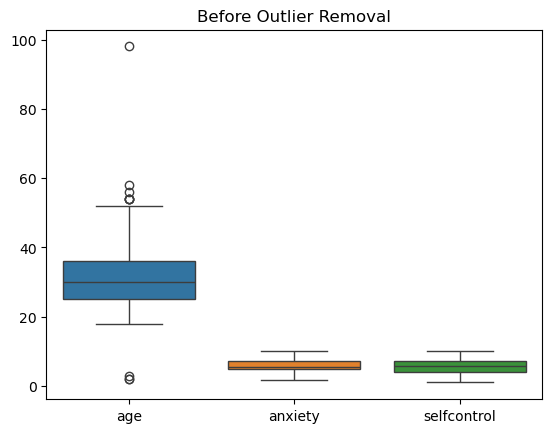

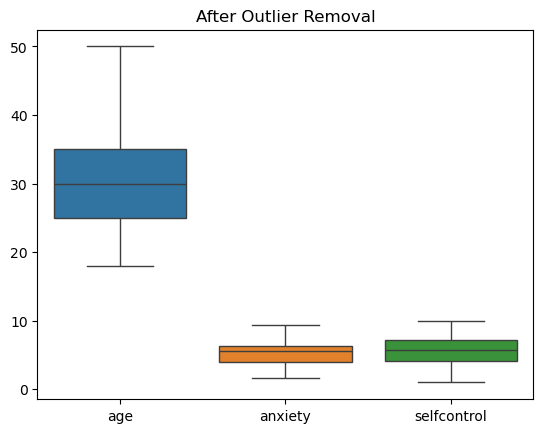

In [239]:
#Visual check
import matplotlib.pyplot as plt

sns.boxplot(data=df[["age", "anxiety", "selfcontrol"]])
plt.title("Before Outlier Removal")
plt.show()

sns.boxplot(data=turnout[["age", "anxiety", "selfcontrol"]])
plt.title("After Outlier Removal")
plt.show()

####f.Find the appropriate columns and do encoding based on your understanding. (4 marks)

In [242]:
encode_df = pd.read_csv("turnout.csv", encoding='ISO-8859-1')

In [251]:
encode_df.columns

Index(['Employee ID', 'event', 'gender', 'age', 'industry', 'profession',
       'traffic', 'coach', 'head_gender', 'greywage', 'way', 'extraversion',
       'independ', 'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

In [253]:
#Frequency encoding on profession
freq_map = encode_df["profession"].value_counts().to_dict()
encode_df["profession_freq"] = encode_df["profession"].map(freq_map)

print(encode_df[["profession", "profession_freq"]].head())

   profession  profession_freq
0          HR              757
1          HR              757
2          HR              757
3          HR              757
4  Commercial               23


In [255]:
#Target encoding on industry using event as target

industry_target_map = encode_df.groupby("industry")["event"].mean().to_dict()
encode_df["industry_target"] = encode_df["industry"].map(industry_target_map)

print(encode_df[["industry", "industry_target"]])


             industry  industry_target
0               Banks         0.657895
1               Banks         0.657895
2     PowerGeneration         0.394737
3     PowerGeneration         0.394737
4              Retail         0.470588
...               ...              ...
1124            Banks         0.657895
1125            Banks         0.657895
1126          Telecom         0.388889
1127          Consult         0.608108
1128           Retail         0.470588

[1129 rows x 2 columns]


####g.Plot the heatmap for the dataset with the applicable columns (4 marks)

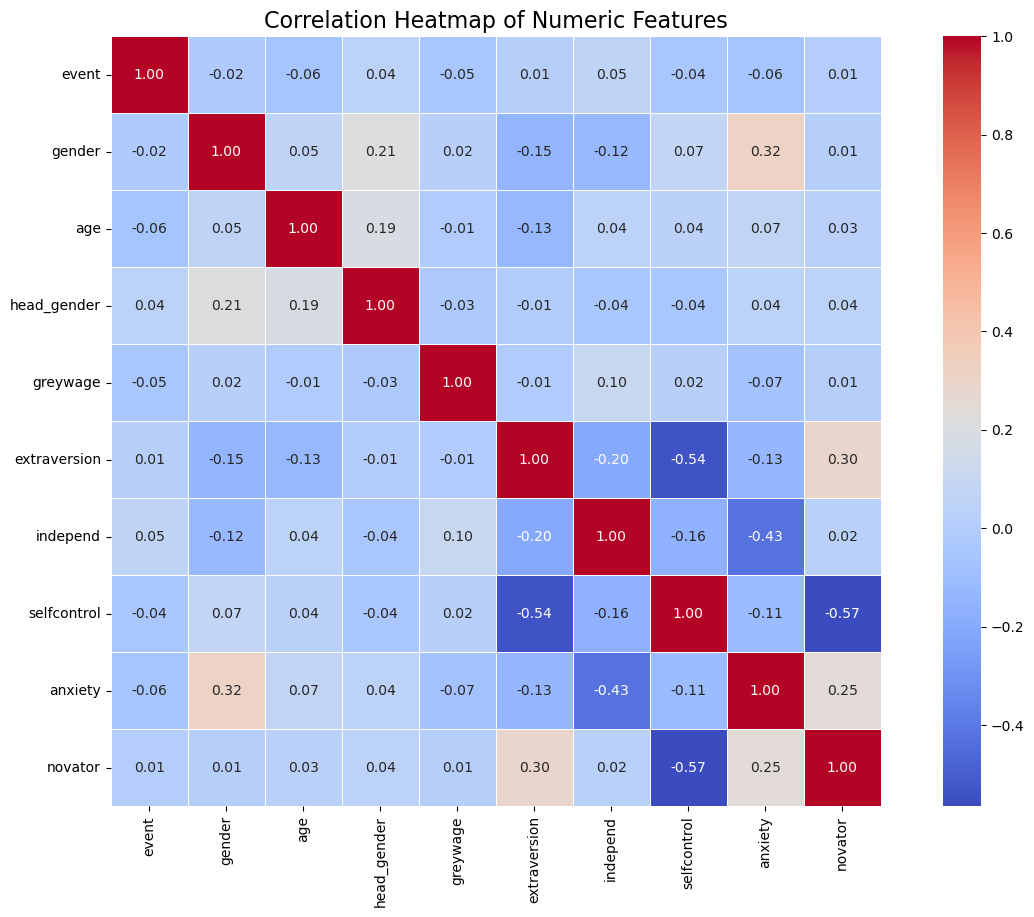

In [249]:
# Drop ID and one-hot columns
exclude_cols = [col for col in df.columns if 'industry_' in col or 
                'profession_' in col or 'traffic_' in col or 
                'coach_' in col or 'way_' in col or 
                col == 'Employee ID']

# Keep only relevant numeric columns
filtered_df = df.drop(columns=exclude_cols)

# Compute correlation matrix
corr_matrix = filtered_df.corr()

plt.figure(figsize=(16, 10))

#Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()
